In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, multivariate_normal
import scipy.stats as sts

In [2]:
df1 = pd.read_csv('datasets\Q_06_latest-2023-2024_RR-T-Vent.csv', sep= ';')
df2 = pd.read_csv('datasets\Q_06_previous-1950-2022_RR-T-Vent.csv', sep = ';')
df1 = df1.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)
df2 = df2.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)
df = pd.concat([df2, df1])
df.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)
df.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
9126,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500101,0.0,9.2,13.2
9127,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500102,0.0,5.2,13.0
9128,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500103,0.0,5.3,13.0
9129,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500104,0.0,6.6,13.8
9130,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500105,0.0,7.0,13.8


In [3]:
unique_values = df[['NOM_USUEL', 'LAT', 'LON']].drop_duplicates()
print(unique_values)

                         NOM_USUEL        LAT       LON
9126               ANTIBES-GAROUPE  43.564667  7.133000
72091                 ANTIBES-GOLF  43.579667  7.091167
94672                 ANTIBES_SAPC  43.599167  7.111167
111632                      ASCROS  43.922000  7.013667
151778             BERRE-DES-ALPES  43.838333  7.321667
...                            ...        ...       ...
1612555                  TENDE-OBS  44.086667  7.595000
1617689            TENDE-CASTERINO  44.091833  7.503500
1627019                 TENDE_SAPC  44.043167  7.586000
1639067              Val Casterino  44.097500  7.505833
12667    BERTHEMONT-LES-BAINS_SAPC  44.044333  7.300833

[91 rows x 3 columns]


In [4]:
min = 1
(a,b) = (-1,-1)
for i in range(len(unique_values)):
    for j in range(i):
        d = (unique_values.iloc[i, 1] - unique_values.iloc[j, 1])**2 + (unique_values.iloc[i, 2] - unique_values.iloc[j, 2])**2
        if 0.0006<d<min:
            min = d
            (a,b) = (i,j)
print(unique_values.iloc[a])
print(unique_values.iloc[b])
print((unique_values.iloc[a, 1] - unique_values.iloc[b, 1])**2 + (unique_values.iloc[b, 2] - unique_values.iloc[b, 2])**2)

NOM_USUEL        Auron
LAT          44.215333
LON             6.9135
Name: 1222810, dtype: object
NOM_USUEL    TINEE-AURON
LAT            44.222667
LON             6.937333
Name: 1189970, dtype: object
5.378755600000255e-05


In [5]:
df_1 = df[df['NOM_USUEL'] == 'ANTIBES-GAROUPE'] #ou Auron pour moins d'écart et plus de corrélation, mais il y a moins de points
df_1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
9126,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500101,0.0,9.2,13.2
9127,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500102,0.0,5.2,13.0
9128,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500103,0.0,5.3,13.0
9129,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500104,0.0,6.6,13.8
9130,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,19500105,0.0,7.0,13.8


In [6]:
df_2 = df[df['NOM_USUEL'] == 'TINEE-AURON']
df_2.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
1189970,6120001,TINEE-AURON,44.222667,6.937333,1605,19520301,0.0,3.1,13.8
1189971,6120001,TINEE-AURON,44.222667,6.937333,1605,19520302,0.0,1.6,14.0
1189972,6120001,TINEE-AURON,44.222667,6.937333,1605,19520303,0.0,0.0,10.4
1189973,6120001,TINEE-AURON,44.222667,6.937333,1605,19520304,0.0,1.4,12.0
1189974,6120001,TINEE-AURON,44.222667,6.937333,1605,19520305,0.0,3.2,13.0


In [7]:
df_merged = df_2.merge(df_1, on='AAAAMMJJ', suffixes=('_2', '_1'))
df_merged[['AAAAMMJJ', 'NOM_USUEL_1', 'TX_1', 'NOM_USUEL_2', 'TX_2']].head()

,AAAAMMJJ,NOM_USUEL_1,TX_1,NOM_USUEL_2,TX_2
0,19520301,ANTIBES-GAROUPE,16.0,TINEE-AURON,13.8
1,19520302,ANTIBES-GAROUPE,15.0,TINEE-AURON,14.0
2,19520303,ANTIBES-GAROUPE,15.9,TINEE-AURON,10.4
3,19520304,ANTIBES-GAROUPE,16.0,TINEE-AURON,12.0
4,19520305,ANTIBES-GAROUPE,15.7,TINEE-AURON,13.0


In [8]:
correlation = df_merged['TX_1'].corr(df_merged['TX_2'])

print(f"Correlation: {correlation}")

Correlation: 0.9041667198396366


In [9]:
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcul de la régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(df_merged['TX_1'], df_merged['TX_2'])

# Prédiction des valeurs de TX_2 en utilisant la régression linéaire
predicted_TX_2 = intercept + slope * df_merged['TX_1']

# Calcul de la RMSE
rmse = np.sqrt(mean_squared_error(df_merged['TX_2'], predicted_TX_2))

print(f"RMSE: {rmse}")

RMSE: 3.201466856057427


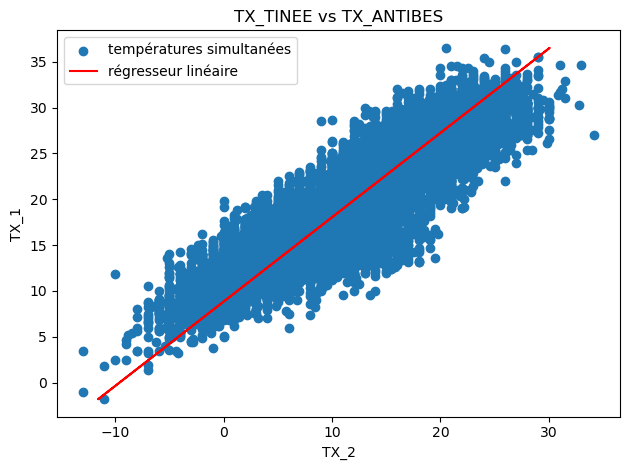

In [10]:

# Plot TX_TINEE vs TX_ANTIBES
plt.scatter(df_merged['TX_2'], df_merged['TX_1'], label = 'températures simultanées')
plt.xlabel('TX_2')
plt.ylabel('TX_1')
plt.title('TX_TINEE vs TX_ANTIBES')

plt.plot(predicted_TX_2,df_merged['TX_1'], color = 'red', label = 'régresseur linéaire')
plt.legend()
plt.tight_layout()
plt.show()

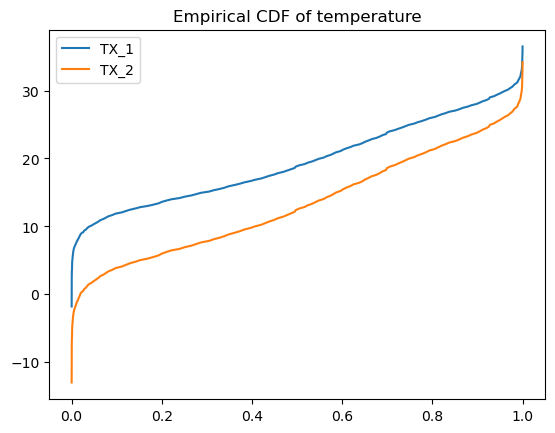

In [11]:
min1, max1 = df_merged['TX_1'].min(), df_merged['TX_1'].max()
min2, max2 = df_merged['TX_2'].min(), df_merged['TX_2'].max()
t1 = np.linspace(min1, max1, 200)
t2 = np.linspace(min2, max2, 200)
n = len(df_merged)
dis_1 = np.array([len(df_merged['TX_1'][df_merged['TX_1'] < t])/n for t in t1])
dis_2 = np.array([len(df_merged['TX_2'][df_merged['TX_2'] < t])/n for t in t2])
plt.plot(dis_1, t1, label='TX_1')
plt.plot(dis_1, t2, label='TX_2')
plt.legend()
plt.title('Empirical CDF of temperature')
plt.show()

In [12]:
dis = np.array([[ len(df_merged[(df_merged['TX_1'] < t01) & (df_merged['TX_2'] < t02)])/n for t01 in t1] for t02 in t2])

TypeError: 'numpy.float64' object is not callable

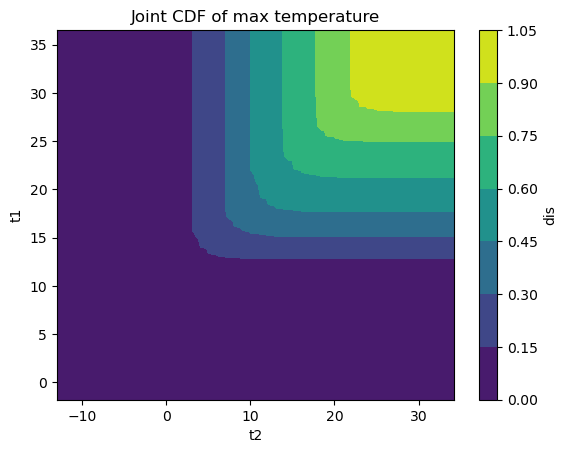

In [14]:

import matplotlib.pyplot as plt
import numpy as np
T1, T2 = np.meshgrid(t1, t2)

plt.contourf(T2, T1, dis, cmap='viridis')

plt.xlabel('t2')
plt.ylabel('t1')

plt.colorbar(label='density')

plt.title('Joint CDF of max temperature')

z = np.array([[min(t1[i], t2[j])]])
plt.show()

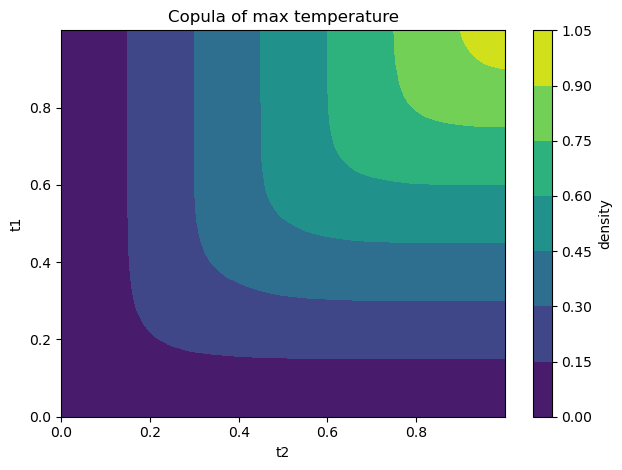

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

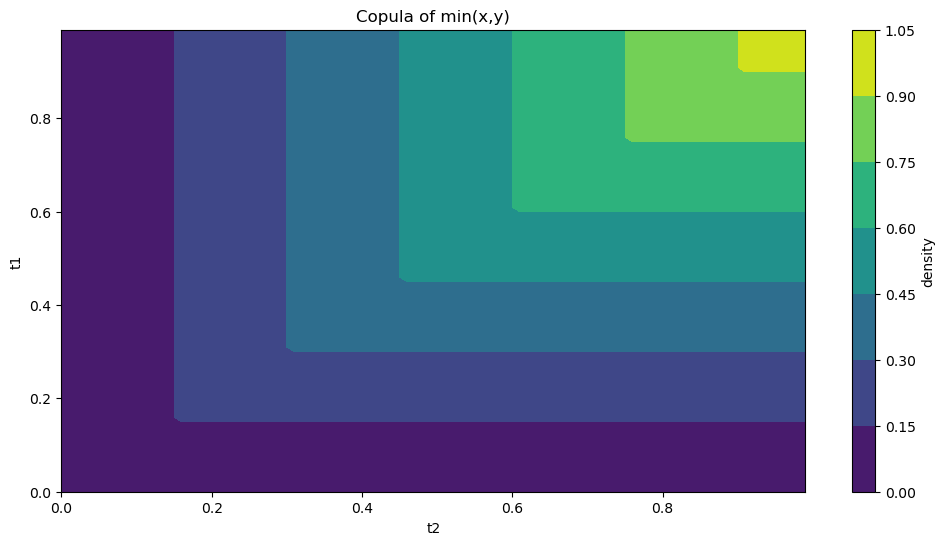

In [20]:
d1, d2 = np.meshgrid(dis_1, dis_2)


# Graphe pour 'dis'
plt.contourf(d2, d1, dis, cmap='viridis')
plt.colorbar(label='density')
plt.title('Copula of max temperature')
plt.xlabel('t2')
plt.ylabel('t1')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

fig, axs = plt.subplots(1, 1, figsize=(6, 6)) 
# Graphe pour 'z'
x,y = np.meshgrid(np.arange(0,1,0.01), np.arange(0,1,0.01))
z = np.minimum(x, y)
plt.contourf(x, y, z, cmap='viridis')
plt.colorbar(label='density')
plt.title('Copula of min(x,y)')
plt.xlabel('t2')
plt.ylabel('t1')
plt.tight_layout()
plt.show()

d = 0
for i in range(len(dis_1)):
    for j in range(len(dis_2)):
        d+= (dis[i][j]-np.minimum(dis_1[i], dis_2[j]))**2
d=np.sqrt(d/(len(dis_1)*len(dis_2)))
print(f"RMSE both copulas : {d}")


On retrouve une copule très semblable à la copule comonotone (ie min(x,y)), ou
parfaitement positivement corrélées.
Copule comonotone : $F(X,Y) = min(F_1(X), F_2(Y))$, donc $X = F_1^{-1}(F_2(Y)) =\phi(Y)$

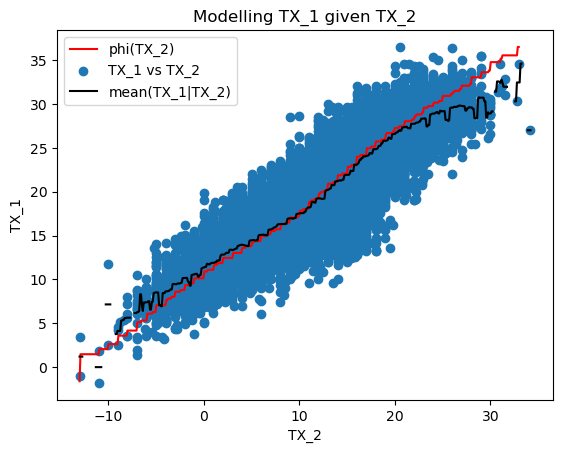

In [ ]:
t2 = np.linspace(min2, max2, 500)
n = len(df_merged)
dis_2 = np.array([len(df_merged['TX_2'][df_merged['TX_2'] < t])/n for t in t2])
F2Y = np.array([len(df_merged['TX_2'][df_merged['TX_2'] < t2[i]])/n for i in range(len(t2))])
phiY = np.array([ t1[np.argmax(dis_1>F2Y[i])] for i in range(len(F2Y)-13)])
plt.plot(t2[:-13], phiY, color = 'red', label = 'phi(TX_2)')
plt.scatter(df_merged['TX_2'], df_merged['TX_1'], label = 'TX_1 vs TX_2')
meanX = np.array([np.mean(df_merged['TX_1'][(t2[i]-0.3 < df_merged['TX_2']) & (df_merged['TX_2'] < t2[i]+0.3)]) for i in range(len(t2))])
plt.plot(t2, meanX, color = 'black', label = 'mean(TX_1|TX_2)')
plt.legend()
plt.title('Modelling TX_1 given TX_2')
plt.xlabel('TX_2')
plt.ylabel('TX_1')
plt.show()